In [1]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid")
import pyramid


# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'pyramid_50ep_1024_fG_wo_slice'
INPUT_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-15 07:34:15.590064: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 07:34:15.590088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 07:34:15.591136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 07:34:15.596511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 07:34:16.172567: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,}

# Create augmentation
# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=False,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

# Create model
model = pyramid.build_model(INPUT_SHAPE)
model.summary()

2024-02-15 07:07:16.811820: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 07:07:16.846832: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 07:07:16.847040: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1024, 1024, 1)]      0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 1024, 1024, 16)       32        ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 1024, 1024, 8)        16        ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 1024, 1024, 16)       160       ['input_1[0][0]']             
                                                                                              

In [3]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)


Epoch 00001: WeightDecayScheduler setting learning rate to 9.999899747381279e-05.
Epoch 1/50


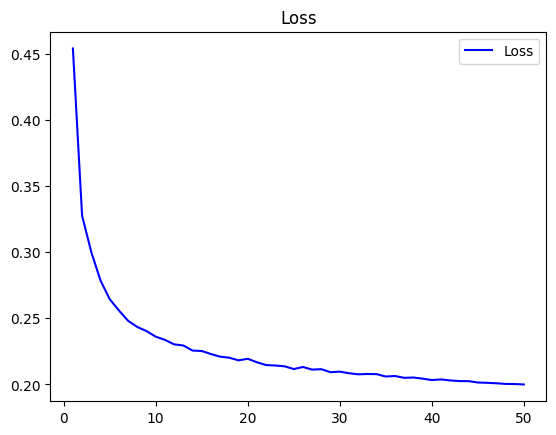

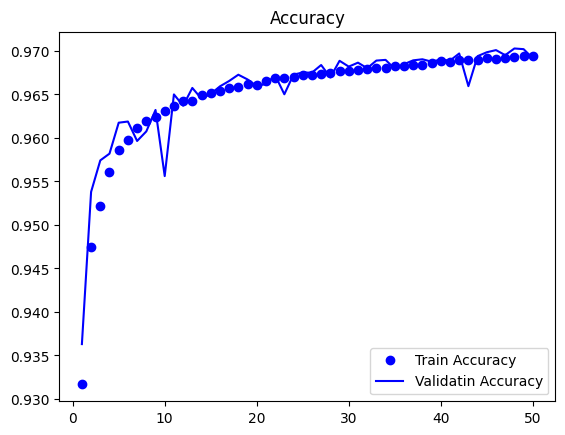

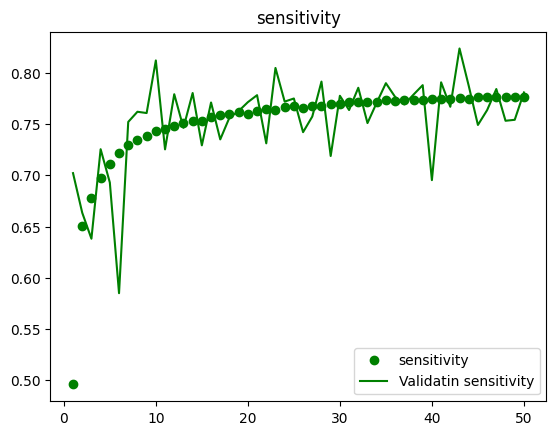

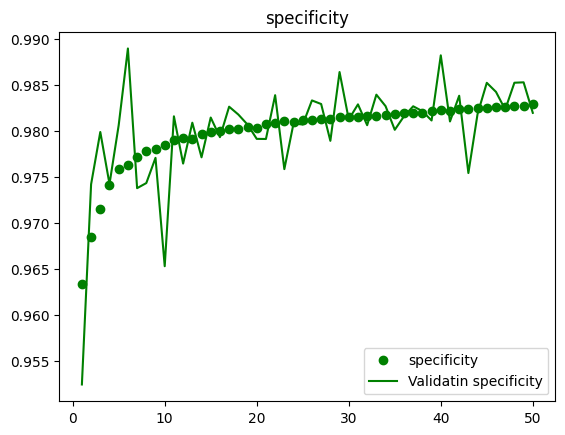

<Figure size 640x480 with 0 Axes>

In [ ]:
check_result.plot_history(HISTORY_PATH)

In [2]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/pyramid_50ep_1024_fG_wo_slice.tf'

test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)
test_generator = data_generator.FullSizedDataGenerator(
    TEST_SOURCE,
    batch_size=4,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


2024-02-15 07:07:28.847166: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 07:07:28.881190: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 07:07:28.881407: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

2024-02-15 07:07:33.234555: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


59/59 [==============================] - 23s 270ms/step - loss: 0.3403 - sensitivity: 0.7397 - specificity: 0.9484 - accuracy: 0.9341 - f1_score: 0.6091 - iou: 0.4401
2번째 epoch 결과


59/59 [==============================] - 17s 267ms/step - loss: 0.2759 - sensitivity: 0.7030 - specificity: 0.9726 - accuracy: 0.9540 - f1_score: 0.6773 - iou: 0.5136
3번째 epoch 결과


59/59 [==============================] - 17s 271ms/step - loss: 0.2640 - sensitivity: 0.6809 - specificity: 0.9786 - accuracy: 0.9581 - f1_score: 0.6896 - iou: 0.5279
4번째 epoch 결과


59/59 [==============================] - 17s 278ms/step - loss: 0.2455 - sensitivity: 0.7590 - specificity: 0.9727 - accuracy: 0.9580 - f1_score: 0.7123 - iou: 0.5552
5번째 epoch 결과


59/59 [==============================] - 17s 275ms/step - loss: 0.2334 - sensitivity: 0.7270 - specificity: 0.9796 - accuracy: 0.9621 - f1_score: 0.7242 - iou: 0.5694
6번째 epoch 결과


59/59 [==============================] - 17s 269ms/step - loss: 0.2513 - sensitivity: 0.6188 - specificity: 0.9893 - accuracy: 0.9637 - f1_score: 0.6991 - iou: 0.5389
7번째 epoch 결과


59/59 [==============================] - 17s 274ms/step - loss: 0.2349 - sensitivity: 0.7839 - specificity: 0.9722 - accuracy: 0.9593 - f1_score: 0.7252 - iou: 0.5712
8번째 epoch 결과


59/59 [==============================] - 17s 280ms/step - loss: 0.2265 - sensitivity: 0.7878 - specificity: 0.9739 - accuracy: 0.9611 - f1_score: 0.7349 - iou: 0.5831
9번째 epoch 결과


59/59 [==============================] - 17s 273ms/step - loss: 0.2163 - sensitivity: 0.7894 - specificity: 0.9759 - accuracy: 0.9631 - f1_score: 0.7453 - iou: 0.5964
10번째 epoch 결과


59/59 [==============================] - 17s 273ms/step - loss: 0.2392 - sensitivity: 0.8321 - specificity: 0.9652 - accuracy: 0.9561 - f1_score: 0.7220 - iou: 0.5673
11번째 epoch 결과


59/59 [==============================] - 17s 267ms/step - loss: 0.2149 - sensitivity: 0.7560 - specificity: 0.9804 - accuracy: 0.9650 - f1_score: 0.7464 - iou: 0.5977
12번째 epoch 결과


59/59 [==============================] - 17s 270ms/step - loss: 0.2122 - sensitivity: 0.8002 - specificity: 0.9758 - accuracy: 0.9637 - f1_score: 0.7507 - iou: 0.6033
13번째 epoch 결과


59/59 [==============================] - 17s 272ms/step - loss: 0.2067 - sensitivity: 0.7741 - specificity: 0.9800 - accuracy: 0.9658 - f1_score: 0.7554 - iou: 0.6094
14번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.2087 - sensitivity: 0.8009 - specificity: 0.9765 - accuracy: 0.9645 - f1_score: 0.7547 - iou: 0.6086
15번째 epoch 결과


59/59 [==============================] - 17s 272ms/step - loss: 0.2126 - sensitivity: 0.7577 - specificity: 0.9807 - accuracy: 0.9654 - f1_score: 0.7490 - iou: 0.6011
16번째 epoch 결과


59/59 [==============================] - 17s 266ms/step - loss: 0.2027 - sensitivity: 0.7921 - specificity: 0.9789 - accuracy: 0.9661 - f1_score: 0.7609 - iou: 0.6165
17번째 epoch 결과


59/59 [==============================] - 17s 266ms/step - loss: 0.2030 - sensitivity: 0.7595 - specificity: 0.9823 - accuracy: 0.9670 - f1_score: 0.7582 - iou: 0.6129
18번째 epoch 결과


59/59 [==============================] - 17s 272ms/step - loss: 0.1984 - sensitivity: 0.7798 - specificity: 0.9812 - accuracy: 0.9674 - f1_score: 0.7650 - iou: 0.6219
19번째 epoch 결과


59/59 [==============================] - 17s 269ms/step - loss: 0.1997 - sensitivity: 0.7871 - specificity: 0.9800 - accuracy: 0.9667 - f1_score: 0.7634 - iou: 0.6198
20번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.2026 - sensitivity: 0.7975 - specificity: 0.9782 - accuracy: 0.9658 - f1_score: 0.7609 - iou: 0.6167
21번째 epoch 결과


59/59 [==============================] - 17s 267ms/step - loss: 0.1996 - sensitivity: 0.8004 - specificity: 0.9787 - accuracy: 0.9664 - f1_score: 0.7647 - iou: 0.6216
22번째 epoch 결과


59/59 [==============================] - 16s 261ms/step - loss: 0.2009 - sensitivity: 0.7491 - specificity: 0.9842 - accuracy: 0.9680 - f1_score: 0.7607 - iou: 0.6161
23번째 epoch 결과


59/59 [==============================] - 17s 266ms/step - loss: 0.2038 - sensitivity: 0.8259 - specificity: 0.9749 - accuracy: 0.9647 - f1_score: 0.7614 - iou: 0.6175
24번째 epoch 결과


59/59 [==============================] - 17s 271ms/step - loss: 0.1969 - sensitivity: 0.7886 - specificity: 0.9806 - accuracy: 0.9674 - f1_score: 0.7673 - iou: 0.6250
25번째 epoch 결과


59/59 [==============================] - 17s 273ms/step - loss: 0.1959 - sensitivity: 0.7966 - specificity: 0.9800 - accuracy: 0.9674 - f1_score: 0.7691 - iou: 0.6273
26번째 epoch 결과


59/59 [==============================] - 17s 267ms/step - loss: 0.1983 - sensitivity: 0.7626 - specificity: 0.9832 - accuracy: 0.9680 - f1_score: 0.7642 - iou: 0.6207
27번째 epoch 결과


59/59 [==============================] - 17s 271ms/step - loss: 0.1936 - sensitivity: 0.7776 - specificity: 0.9825 - accuracy: 0.9684 - f1_score: 0.7703 - iou: 0.6289
28번째 epoch 결과


59/59 [==============================] - 17s 265ms/step - loss: 0.1960 - sensitivity: 0.8044 - specificity: 0.9790 - accuracy: 0.9670 - f1_score: 0.7684 - iou: 0.6264
29번째 epoch 결과


59/59 [==============================] - 17s 271ms/step - loss: 0.1942 - sensitivity: 0.7376 - specificity: 0.9865 - accuracy: 0.9693 - f1_score: 0.7660 - iou: 0.6229
30번째 epoch 결과


59/59 [==============================] - 17s 270ms/step - loss: 0.1920 - sensitivity: 0.7978 - specificity: 0.9805 - accuracy: 0.9680 - f1_score: 0.7725 - iou: 0.6319
31번째 epoch 결과


59/59 [==============================] - 17s 272ms/step - loss: 0.1914 - sensitivity: 0.7778 - specificity: 0.9829 - accuracy: 0.9688 - f1_score: 0.7721 - iou: 0.6313
32번째 epoch 결과


59/59 [==============================] - 17s 278ms/step - loss: 0.1923 - sensitivity: 0.7979 - specificity: 0.9805 - accuracy: 0.9679 - f1_score: 0.7720 - iou: 0.6312
33번째 epoch 결과


59/59 [==============================] - 17s 267ms/step - loss: 0.1916 - sensitivity: 0.7736 - specificity: 0.9833 - accuracy: 0.9688 - f1_score: 0.7717 - iou: 0.6308
34번째 epoch 결과


59/59 [==============================] - 17s 266ms/step - loss: 0.1881 - sensitivity: 0.7874 - specificity: 0.9825 - accuracy: 0.9690 - f1_score: 0.7759 - iou: 0.6363
35번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1917 - sensitivity: 0.8056 - specificity: 0.9800 - accuracy: 0.9680 - f1_score: 0.7744 - iou: 0.6343
36번째 epoch 결과


59/59 [==============================] - 17s 267ms/step - loss: 0.1912 - sensitivity: 0.8011 - specificity: 0.9804 - accuracy: 0.9680 - f1_score: 0.7737 - iou: 0.6335
37번째 epoch 결과


59/59 [==============================] - 17s 264ms/step - loss: 0.1911 - sensitivity: 0.7851 - specificity: 0.9824 - accuracy: 0.9688 - f1_score: 0.7739 - iou: 0.6338
38번째 epoch 결과


59/59 [==============================] - 17s 271ms/step - loss: 0.1883 - sensitivity: 0.7907 - specificity: 0.9822 - accuracy: 0.9690 - f1_score: 0.7761 - iou: 0.6367
39번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1872 - sensitivity: 0.8044 - specificity: 0.9809 - accuracy: 0.9688 - f1_score: 0.7782 - iou: 0.6394
40번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1947 - sensitivity: 0.7223 - specificity: 0.9880 - accuracy: 0.9697 - f1_score: 0.7643 - iou: 0.6205
41번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1888 - sensitivity: 0.8049 - specificity: 0.9807 - accuracy: 0.9686 - f1_score: 0.7771 - iou: 0.6381
42번째 epoch 결과


59/59 [==============================] - 17s 265ms/step - loss: 0.1881 - sensitivity: 0.7776 - specificity: 0.9838 - accuracy: 0.9696 - f1_score: 0.7767 - iou: 0.6373
43번째 epoch 결과


59/59 [==============================] - 17s 269ms/step - loss: 0.1967 - sensitivity: 0.8374 - specificity: 0.9751 - accuracy: 0.9657 - f1_score: 0.7690 - iou: 0.6272
44번째 epoch 결과


59/59 [==============================] - 17s 266ms/step - loss: 0.1861 - sensitivity: 0.7988 - specificity: 0.9817 - accuracy: 0.9691 - f1_score: 0.7788 - iou: 0.6403
45번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1870 - sensitivity: 0.7655 - specificity: 0.9850 - accuracy: 0.9699 - f1_score: 0.7757 - iou: 0.6360
46번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1853 - sensitivity: 0.7793 - specificity: 0.9839 - accuracy: 0.9699 - f1_score: 0.7786 - iou: 0.6399
47번째 epoch 결과


59/59 [==============================] - 17s 270ms/step - loss: 0.1862 - sensitivity: 0.7934 - specificity: 0.9824 - accuracy: 0.9694 - f1_score: 0.7791 - iou: 0.6406
48번째 epoch 결과


59/59 [==============================] - 16s 261ms/step - loss: 0.1868 - sensitivity: 0.7700 - specificity: 0.9848 - accuracy: 0.9700 - f1_score: 0.7776 - iou: 0.6386
49번째 epoch 결과


59/59 [==============================] - 17s 268ms/step - loss: 0.1853 - sensitivity: 0.7702 - specificity: 0.9850 - accuracy: 0.9703 - f1_score: 0.7788 - iou: 0.6401
50번째 epoch 결과


59/59 [==============================] - 17s 273ms/step - loss: 0.1902 - sensitivity: 0.7982 - specificity: 0.9813 - accuracy: 0.9687 - f1_score: 0.7765 - iou: 0.6372


In [3]:
import pickle
# Save the metrics as a dictionary
metrics_dict = {
    'loss': loss,
    'sen': sen,
    'spe': spe,
    'acc': acc,
    'f1': f1,
    'iou': iou
}

# Define the file path
file_path = 'pyramid_50ep_1024_fG_wo_slice_metrics_data.pkl'

# Write the metrics to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(metrics_dict, f)

In [4]:
file_path = 'pyramid_50ep_1024_fG_wo_slice_metrics_data.pkl'

# Load the metrics from the pickle file
with open(file_path, 'rb') as f:
    metrics_dict = pickle.load(f)

# Access the metrics from the loaded dictionary
loss = metrics_dict['loss']
sen = metrics_dict['sen']
spe = metrics_dict['spe']
acc = metrics_dict['acc']
f1 = metrics_dict['f1']
iou = metrics_dict['iou']

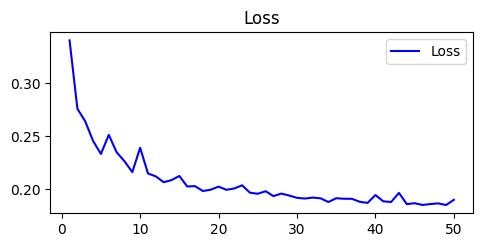

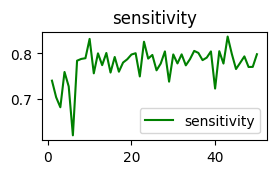

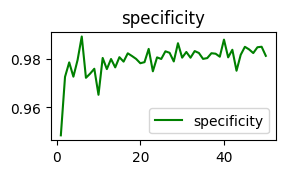

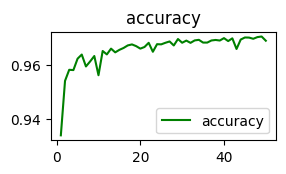

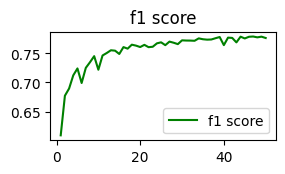

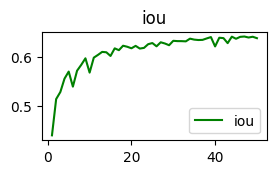

<Figure size 640x480 with 0 Axes>

In [5]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)

In [2]:
ustom_objects = {'DiceLoss': loss.DiceLoss(),
'sensitivity': metrics.sensitivity,
'specificity': metrics.specificity,
'accuracy' : metrics.accuracy,
'f1_score' : metrics.f1_score,
'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/pyramid_50ep_512_sG_wo_slice.tf/41--0.2058-0.7719-0.9824-0.2081-0.7989-0.9790.pb'
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)

file_list = ["AFIO", "ARIA", "Chase", "DR_HAGIS", "DRIVE", "DualModal", "FIVES", "HRF", "IOSTAR", "LES-AV", "ORVS", "RETA", "STARE", "TREND", "UoA-DR"]
for file in file_list:
    print(f"{file} result")
    test_generator = data_generator.FullSizedDataGeneratorForTest(
    TEST_SOURCE,
    file_name=file,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
    )
metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

AFIO result


AttributeError: module 'data_generator' has no attribute 'FullSizedDataGeneratorForTest'